**load required packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [ ]:
# Load Black_Friday data set
dataframe = pd.read_csv("Black_Friday.csv")

# **Step 1. Data Cleaning**

***User_ID***:     convert into string

***Product_ID***:   convert into string

***Gender***:     convert into M=1 F=0,then convert into string (one_hot encode)

***Age:***         convert into 7 age groups (1-7)

***Occupation:***    convert into string (one_hot encode)

***City_Category:***        convert into A=1,B=2,C=3, then convert into string(one_hot encode)

***Stay_in_current_city_year:***     5 groups

***Marital_Status:***      convert into string (one_hot encode)

***Product_Category_1:***  convert into string (one_hot encode)

***Purchase:***        check data type should be numeric

## Self-defined functions

**convert string type ordinal variable(eg: age, stay_in_current_city_years) into numeric data type**

In [ ]:
# here, we try to get the number of lower range to represent different age group
def get_left(str):
  result = ''                           #set an empty string
  for i in range(0, len(str),1):
    if str[i] >='0'and str[i]<='9':     #whether i is num
      result += str[i]                  #if not, add it
    else:
      break
  return result

In [ ]:
'''
we try to convert 'age' and 'Stay_In_Current_City_Years' into numeric data type 
'''

def str_2_int(data):
  data['Age'] = data['Age'].map(get_left)         #get the lower range to represent an age group, eg: 4+ to 4
  data['Age'] = data['Age'].astype('int64')       #change string into number
  data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map(get_left)  #get the lower range to represent an age group
  data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype('int64')   #convert string into number
  return data



**convert numeric type nominal variable (eg: ID) into string data type**

In [ ]:
'''
Here, we try to convert numeric type nominal variable into string data type
'Product_Category_1','Product_Category_2','Marital_Status','Occupation','User_ID','Product_ID','Gender','City_Category' are the 
categories that we will convert
string: are explicitly treated as strings
'''


def int_2_str(data):
  data['Product_Category_1']=data['Product_Category_1'].astype('string')      #convert Product_Category_1 and Product_Category_2 into string
  data['Product_Category_2']=data['Product_Category_2'].astype('string')
  data['Marital_Status']=data['Marital_Status'].astype('string')
  data['Occupation']=data['Occupation'].astype('string')
  data['User_ID']=data['User_ID'].astype('string')
  data['Product_ID']=data['Product_ID'].astype('string')     # add product ID
  data['Gender']=data['Gender'].map({"M":'1',"F":'0'})
  data['Gender']=data['Gender'].astype('string')    # convert Gender to string
  data['City_Category']=data['City_Category'].map(lambda x:ord(x)-ord('A')+1) #use ascii to convert
  data['City_Category'] = data['City_Category'].astype('string')   # convert city category to string
  return data



**Handle missing values**

In [ ]:
'''
we try to delete the column that contains too many NAN. Meanwhile, we will also delete some rows that contains NAN
'''

def filter_blank(data):
  data = data.drop("Product_Category_3", axis=1) #delete the entire column of product_category_3 since it contains too many NA
  data = data.dropna(subset=['Product_Category_2']) #delete some rows that contains NA
  return data

In [ ]:
#combine all the function here
def clean_data(data):
  data=str_2_int(data)
  data=int_2_str(data)
  data=filter_blank(data)
  return data

In [ ]:
#do the data cleaning here
df = clean_data(dataframe)   
print(df.head())
print(df.info())

   User_ID Product_ID Gender  ...  Product_Category_1 Product_Category_2 Purchase
1  1000001  P00248942      0  ...                   1                6.0    15200
3  1000001  P00085442      0  ...                  12               14.0     1057
5  1000003  P00193542      1  ...                   1                2.0    15227
6  1000004  P00184942      1  ...                   1                8.0    19215
7  1000004  P00346142      1  ...                   1               15.0    15854

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 343246 entries, 1 to 497995
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     343246 non-null  string
 1   Product_ID                  343246 non-null  string
 2   Gender                      343246 non-null  string
 3   Age                         343246 non-null  int64 
 4   Occupation                 

# **Step 2. Exploratory Data Analysis**

EDA plot:

**Display number of customer for each gender**


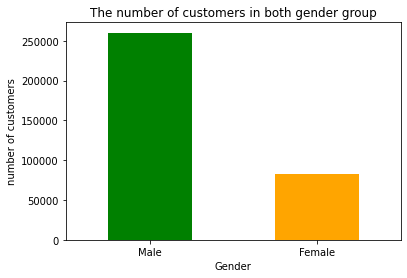

In [ ]:
# Bar chart for comparing number of customers in both gender groups

label = ['Male','Female']

df1 = df[['Gender', 'Purchase']]   #only focus on the column 'Gender' and 'Purchase'
customer_count = df1['Gender'].value_counts() #count the number of customer for each gender
customer_count.plot.bar(x='Gender', y='number of customers', rot=360, color=['green','orange'])
plt.xticks([0,1],labels=label, rotation=360)
plt.xlabel('Gender')
plt.ylabel('number of customers')
plt.title('The number of customers in both gender group')
plt.show()
 

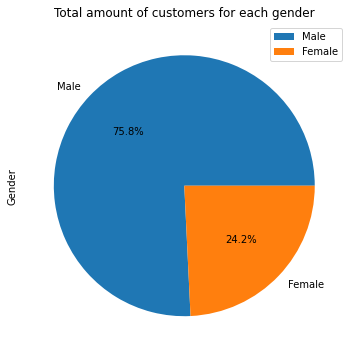

In [ ]:
# Pie chart for comparing number of customers in both gender groups

label = ['Male','Female']
customer_count.plot.pie(figsize=(6, 6), autopct='%1.1f%%', 
                        title='Total amount of customers for each gender', labels = label )
plt.legend()
plt.show() 

As shown in the bar chart and pie chart, the total number of male customer are much higher than the total number of female customers. More specifically, the number of male customers are approximately 3 times higher than females.

**Display total amount of purchase for each gender group**

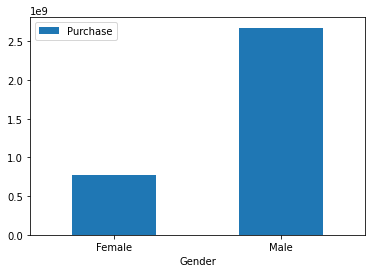

In [ ]:
# Bar chart for comparing total amount of purchase for each gender groups

label = ['Female','Male']
purchase_sum = df1.groupby('Gender').sum()
purchase_sum.plot.bar(rot=360)
plt.xticks([0,1],labels=label)
plt.show()

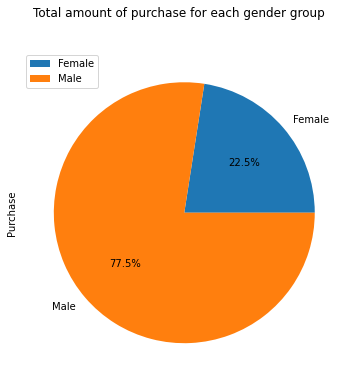

In [ ]:
# Pie chart for comparing total amount of purchase for each gender groups

label = ['Female','Male']
purchase_sum = df1.groupby('Gender').sum()
purchase_sum.plot.pie(figsize=(6, 6), autopct='%1.1f%%', 
                        title='Total amount of purchase for each gender group', 
                      labels = label, subplots = True )
plt.legend()
plt.show() 

As shown in the bar chart and pie chart, the total amount of purchase for male customers are much higher than the total amount of purchase for female customers. More specifically, the total amount of purchase for male customers are approximately 3 times higher than females.



From the first two figures we could easily find out that this dataset is unbalanced with respect to gender, and the ratio of male customers to female customers is roughly 3.12 to 1. 



**Display total amount of purchase for different cities**

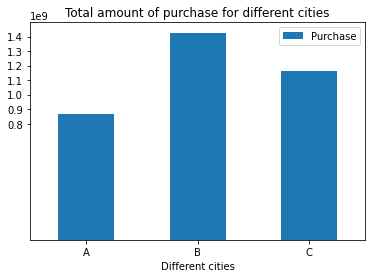

In [ ]:
# Bar chart for comparing amount of purchase for different cities
label = ['A','B','C']

df2= df[['City_Category','Purchase']]   # Only focus on 'City_Category' and'Purchase' column
city_purchase_sum=df2.groupby('City_Category').sum()  # Calculate the sum of purchase based on City_Category

city_purchase_sum.plot.bar(title="Total amount of purchase for different cities")  # Title of the bar chart
my_y_ticks = np.arange(800000000, 1500000000, 100000000)
plt.yticks(my_y_ticks)
plt.xticks([0,1,2],labels=label, rotation=360)
plt.xlabel('Different cities')
plt.show()

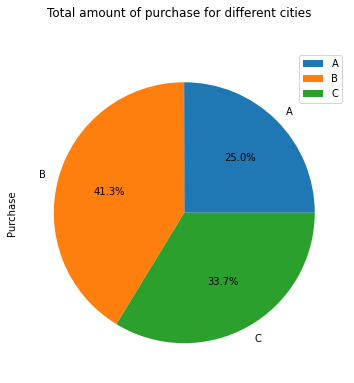

In [ ]:
# Pie chart for comparing total amount of purchase for different cities

label = ['A','B','C']
city_purchase_sum.plot.pie(figsize=(6, 6), autopct='%1.1f%%', 
                        title='Total amount of purchase for different cities', 
                      labels = label, subplots = True )
plt.legend()
plt.show() 

As shown in the bar chart and pie chart, the total amount of purchase for city B is much higher than city A and city B. More specifically, the total amount of purchase for city B is the highest, and city C has the second highest amount of purchase.

## Q3



**Display total amount of purchase for combinations of gender and age groups.**



In [ ]:
df3 = df[['Gender', 'Age', 'Purchase']]
# df["Gender"] = df["Gender"].map({'1': 'male', '0': 'female'})
purchase_sum = df3.groupby(['Gender', 'Age']).sum()

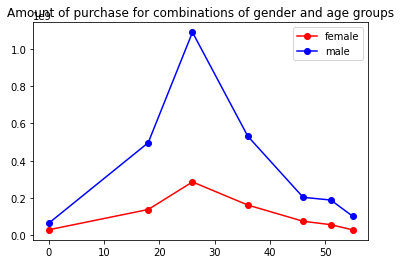

In [ ]:
# Line chart for comparing amount of purchase for combinations of gender and age groups

female_data = purchase_sum.loc['0']
male_data = purchase_sum.loc['1']
x = female_data.index
    # print(x)
    # print(purchase_sum.loc['female'])
plt.plot(x, female_data, label='female', color='red', marker='o')
plt.plot(x, male_data, label='male', color='blue', marker='o')
plt.title("Amount of purchase for combinations of gender and age groups")
plt.legend()
plt.show()

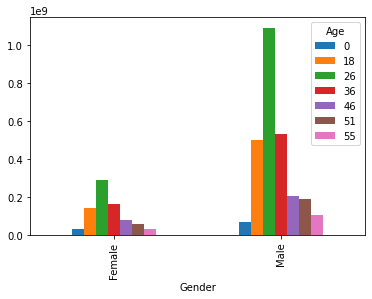

In [ ]:
# Bar chart for comparing amount of purchase for combinations of gender and age groups

purchase_sum.reset_index(inplace=True)

purchase_sum.pivot("Gender", "Age", "Purchase").plot(kind='bar')
plt.xticks(np.arange(2), ("Female", "Male"))

plt.show()

As shown in the bar chart and line chart, in both gender groups, the total amount of purchase for the 26 years old age group is much higher than other 6 age groups. More specifically, male customers in 26 years old age group have the highest amount of purchase than others, so if only consider the gender feature, male customers should be regarded as better target for marketing campaign, and if we consider both gender and age features, male customers in 26 years old age group should be regarded as better target for marketing campaign. 



**Display distribution of purchase amount among Gender and age groups in boxplot**



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


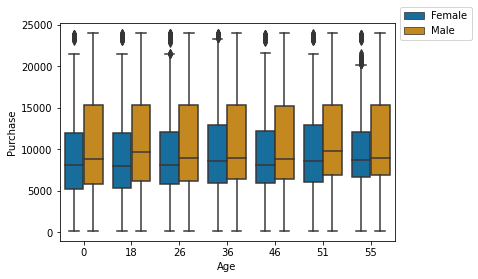

In [ ]:
# Display distribution of purchase amount among Gender + age groups by using boxplot

df5 = df3
df5["Gender"].replace({"0": "Female", "1": "Male"}, inplace=True)

boxplot = sns.boxplot(y='Purchase', x='Age',data=df5,palette="colorblind", hue='Gender')
boxplot.legend(loc='center left', bbox_to_anchor=(1, 1), ncol=1)


Based on the box plots above, there are two main findings that we can read from the plot directly:
1. Compared with the female's purchase amount, male had more purchase power. Therefore, gender is one of the factors that will influence the purchase amount. Male is better target for marketing campaign.
2. Age is not the direct factor that will influence the purchase amount. What we can find from the box plot is that the purchase amount among different age group are relatively stable. They does not have too much difference.











**Display distribution of purchase among Occupations**

In [ ]:
df6 = df
df6 = df6.drop(["User_ID","Product_ID"], axis=1)

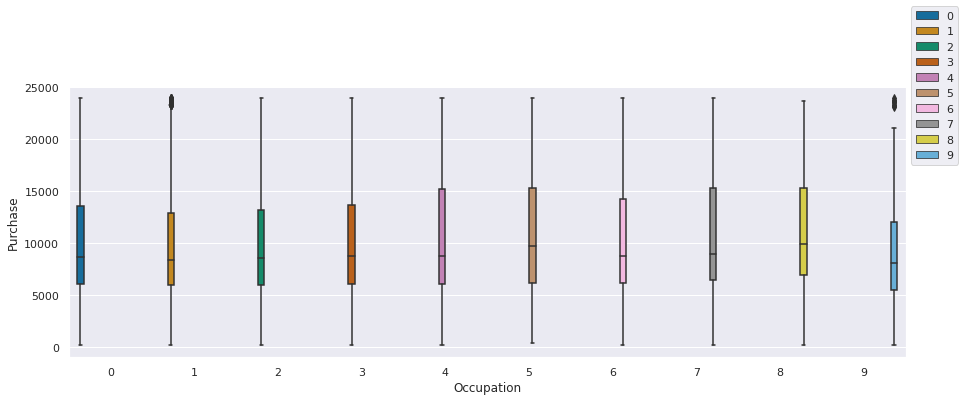

In [ ]:
# Display distribution of purchase among first 10 Occupations 

df6['Occupation']=df6['Occupation'].astype('int64')
df6_1 = df6[df6['Occupation'] <10]

sns.set(rc={'figure.figsize':(15,5)})
boxplot = sns.boxplot(y='Purchase', x='Occupation',data=df6_1,width=0.8, palette="colorblind",
                      hue='Occupation')
boxplot.legend(loc='center left', bbox_to_anchor=(1, 1), ncol=1)

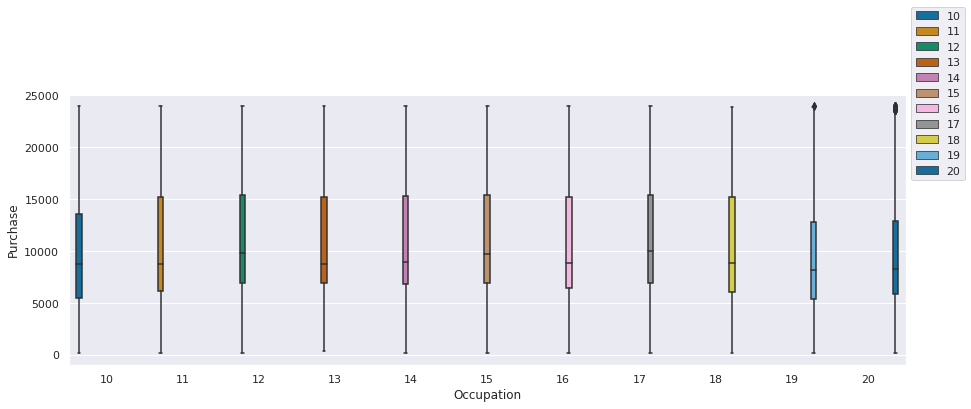

In [ ]:
# Display distribution of purchase among last 11 Occupations 

df6_2 = df6[df6['Occupation'] >=10]

sns.set(rc={'figure.figsize':(15,5)})
boxplot = sns.boxplot(y='Purchase', x='Occupation',data=df6_2,width=0.8, palette="colorblind",
                      hue='Occupation')
boxplot.legend(loc='center left', bbox_to_anchor=(1, 1), ncol=1)

From the box and whisker plot above, we can find that occupation 4,5,7,8,11,12,14,15, and 17 have relative higher purchase amounts compared with the rest occupations. In other word, those occupations may have more purchasing power. They can be the main targets for marketing. 

**Heat map:**


In [ ]:
 '''
 Remove the unnecessary columns such as User_ID and Product_ID that function as 
 the primary key to distinguish each involved customer and product and are not
 relative to the prediction model we try to introduce 
 '''

df6 = df
df6 = df6.drop(["User_ID","Product_ID"], axis=1)

Since we only focus the correlation between numerical features, the correlation matrix will only contain Age, Stay_In_Current_City_Years and Purchase these three columns. The rest of six columns are all nominal variables where no ordered relationship among each categorical value, and correlation matrix is not a proper measurement for them.

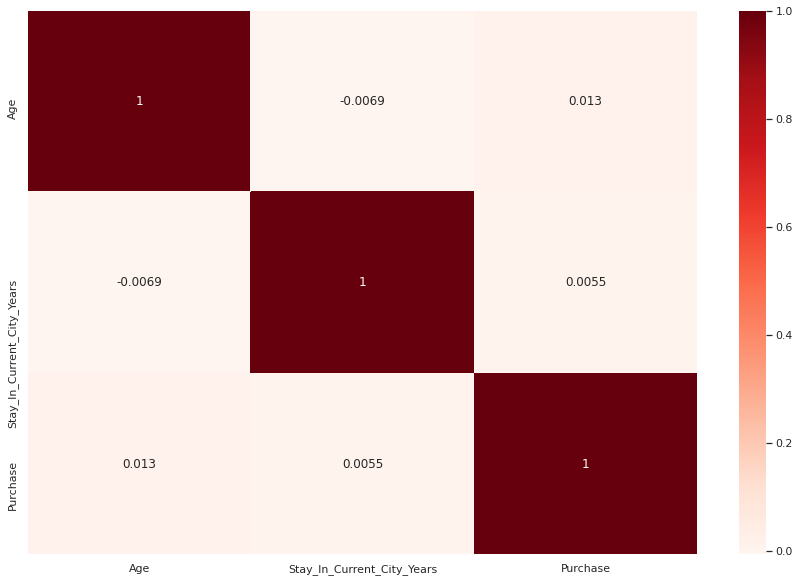

In [ ]:
# Display the heat map 

plt.rcParams['figure.figsize'] = (15.0, 10.0)   # Set the figure size
cor = df6.corr()                                # Calculate the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Display the correlation matrix 

cor

,Age,Stay_In_Current_City_Years,Purchase
Age,1.000000,-0.006913,0.012606
Stay_In_Current_City_Years,-0.006913,1.000000,0.005511
Purchase,0.012606,0.005511,1.000000



From the hearmap and correlation matrix output, we can find that the correlation between *Age* and *Purchase* is about 0.0126, that indicates there is a positive relationship and weak correlation between them, since value close to 1 or -1 will be considered as strong correlated. 

The correlation between *Stay_In_Current_City_Year* and *Purchase* is about -0.0069, that indicates there is a negative relationship and weak correlation between them, since value close to 1 or -1 will be considered as strong correlated. 


# **Step 3. Data Modeling**

**Feature Engineering**:

1. For categorical columns,use dummy variable to turn categorical column into columns of binary values(one-hot encoded vector)


In [ ]:
# One-hot encode to convert categorical columns into binary values
# Categorical columns are Gender, Occupation, City_Category, Marital_Status, Product_Category_1, Product_Category_2

new_df = df
new_df = pd.get_dummies(data= new_df, columns=['Gender', 'Occupation',
  'City_Category','Marital_Status','Product_Category_1',"Product_Category_2"])

In [ ]:
 '''
 Remove the unnecessary columns such as User_ID and Product_ID that function as 
 the primary key to distinguish each involved customer and product and are not
 relative to the prediction model we try to introduce 
 '''

 new_df =  new_df.drop(["User_ID","Product_ID"], axis=1)

2. Normalize all numerical columns using mean normalization.


In [ ]:
norm_df = new_df

In [ ]:
# Only normalize numerical columns (Age, Stay_In_Current_City_Years) using mean normalization.
# We don't apply normalization on depedent variable Purchase or categorical columns


def mean_norm(data):
  mean_age = data['Age'].mean(axis = 0)                           # Calculate the mean value for Age 
  mean_stay = data['Stay_In_Current_City_Years'].mean(axis = 0)   # Calculate the mean value for Stay_In_Current_City_Years
  max_age = data['Age'].max(axis=0)                               # Calculate the max value for Age
  max_stay = data['Stay_In_Current_City_Years'].max(axis=0)       # Calculate the max value for Stay_In_Current_City_Years
  min_age = data['Age'].min(axis=0)                               # Calculate the min value for Age
  min_stay = data['Stay_In_Current_City_Years'].min(axis=0)       # Calculate the min value for Stay_In_Current_City_Years

# Use mean normalization 
  data['Age'] = (data['Age'] - mean_age)/(max_age - min_age)      
  data['Stay_In_Current_City_Years'] = (data['Stay_In_Current_City_Years'] - mean_stay)/(max_stay - min_stay) 
  return data

In [ ]:
# Apply the normalization function

norm_df = mean_norm(norm_df)

**Linear Regression Model:**

1. Split the dataset into training and testing dataset(80:20  train:test ratio)


In [ ]:
# Split dataframe into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Purchase', 
                                      axis=1), new_df['Purchase'], test_size=0.20, random_state=0)

2. Create and fit a multivariant linear regression model to training set


In [ ]:
from sklearn import linear_model


model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. Test the trained model over testing set, and calculate MAE and MSE



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

# Calculate MAE of the regression model
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE of the regression model
mse = mean_squared_error(y_test, y_pred)

# Report MAE and MSE
print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error (MAE): {:.2f}'.format(mean_absolute_error(y_test, y_pred)))


Mean squared error (MSE): 10381655.79
Mean absolute error (MAE): 2462.91


### At this moment, we do not know the MSE and MAE of the regression model we get here are the optimal result, so we try to apply the regression model over normalized data frame to find out whether we will get smaller value of MSE and MAE.

**Test the trained model over normalized data frame**

In [ ]:
# norm_df is the normalized data frame we get in Q1, second step.

from sklearn.model_selection import train_test_split

X_normtrain, X_normtest, y_normtrain, y_normtest = train_test_split(norm_df.drop('Purchase', 
                                      axis=1), norm_df['Purchase'], test_size=0.20, random_state=0)

In [ ]:
from sklearn import linear_model

model_norm = linear_model.LinearRegression()
model_norm.fit(X_normtrain, y_normtrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_normpred = model_norm.predict(X_normtest)

# Calculate MAE of the regression model
mae = mean_absolute_error(y_normtest, y_normpred)

# Calculate MSE of the regression model
mse = mean_squared_error(y_normtest, y_normpred)

print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error (MAE): {:.2f}'.format(mean_absolute_error(y_test, y_pred)))

Mean squared error (MSE): 10381655.79
Mean absolute error (MAE): 2462.91


### Compare with the previous trained model, the value of MSE and MAE hold the same. So at this moment, the normalized data actually does not influence the prediction model performance. Now we will perform feature selection to find the most important features to the prediction model and discovery whether we will have a better trained model. 

**Feature Selection__Recursive Feature Elimination**

In [ ]:
feature_df = df
feature_df =  feature_df.drop(["User_ID","Product_ID"], axis=1)

In [ ]:
# Split dataframe into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df.drop('Purchase', 
                                      axis=1), feature_df['Purchase'], test_size=0.20, random_state=0)

In [ ]:
# Perform recursive feature elimination for the regression model to find most important features


from sklearn.feature_selection import RFE


fea_reg = linear_model.LinearRegression()


rfe_model = RFE(fea_reg, 7, step=1) 
rfe=rfe_model.fit(X_train,y_train) 


In [ ]:
print(rfe.support_)
print(rfe.ranking_)     # Get the position of the best 7 features

[ True  True False  True  True  True  True  True]
[1 1 2 1 1 1 1 1]


The best 7 features for the regression model to predict Purchase are:

Gender, Age, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2

In [ ]:
# Drop the Occupation column
# Turn categorical columns into columns of binary values

feature_df =  feature_df.drop(["Occupation"], axis=1)

feature_df = pd.get_dummies(data= feature_df, columns=['Gender', 'City_Category',
                    'Marital_Status','Product_Category_1',"Product_Category_2"])

In [ ]:
from sklearn.model_selection import train_test_split

X_featrain, X_featest, y_featrain, y_featest = train_test_split(feature_df.drop('Purchase', 
                                      axis=1), feature_df['Purchase'], test_size=0.20, random_state=0)

In [ ]:
from sklearn import linear_model

model_fea = linear_model.LinearRegression()
model_fea.fit(X_featrain, y_featrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_feapred = model_fea.predict(X_featest)

# Calculate MAE of the regression model
mae = mean_absolute_error(y_featest, y_feapred)

# Calculate MSE of the regression model
mse = mean_squared_error(y_featest, y_feapred)

print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_featest, y_feapred)))
print('Mean absolute error (MAE): {:.2f}'.format(mean_absolute_error(y_featest, y_feapred)))

Mean squared error (MSE): 10397994.46
Mean absolute error (MAE): 2465.31


After three trials, we get the best outcome of the trained model when we apply the regression model over the original dataframe(not drop Occupation column) and normalization will not influence the performance of the regression model. So we will apply the first trained model with normalized dataframe on Black_Final_Test.csv

**Final Model Evaluation:**

1. Load Black_Friday_Final_Test.csv, and apply the trained regression model from Q2


In [ ]:
test_dataframe = pd.read_csv("Black_Friday_Final_Test.csv")


In [ ]:
 '''
 Remove the unnecessary columns such as User_ID and Product_ID that function as 
 the primary key to distinguish each involved customer and product and are not
 relative to the prediction model we try to introduce 
 '''
from sklearn.preprocessing import OneHotEncoder

# Apply cleaning function, feature engineering and normalization to the test dataframe
test_df = clean_data(test_dataframe)
test_df =  test_df.drop(["User_ID","Product_ID"], axis=1)
test_df = mean_norm(test_df)
test_df = pd.get_dummies(data= test_df, columns=['Gender', 'Occupation',
  'City_Category','Marital_Status','Product_Category_1',"Product_Category_2"])

2. Calculate and report MAE and MSE

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_df.drop('Purchase', 
                                      axis=1), test_df['Purchase'], test_size=0.20, random_state=0)

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

# Calculate MAE of the regression model
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE of the regression model
mse = mean_squared_error(y_test, y_pred)

print('Mean squared error (MSE): {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('Mean absolute error (MAE): {:.2f}'.format(mean_absolute_error(y_test, y_pred)))

Mean squared error (MSE): 10250242.74
Mean absolute error (MAE): 2451.59


From the output above, the performance measurements(MSE & MAE) of the regression model are 10250242.74 and 2451.59 respectively.